<h1 style="color:#008000;font-size:30px">Machine Learning - Predict the Potential Carbon Footprint:</h1>


<h3 style="color:#8B0000;">Imported All the necessary libraries:</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

<h3 style="color:#8B0000;"> Read the Data set and store it in a pandas Data Frame :</h3>


In [2]:
df = pd.read_csv('Food_Production.csv')

<h1 style="color:#008000;font-size:30px"> Exploratory Data Analysis:</h1>

<h3 style="color:#8B0000;">Display the dimension of the dataset:</h3>

In [3]:
df.shape

(43, 23)

<h3 style="color:#8B0000;">Display the column names of dataset:</h3>

In [4]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

<h3 style="color:#8B0000;">print the first ten rows of the data frame:</h3>

In [5]:
df.head(10)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.77465,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.17647,3762.568306
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,...,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,...,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,...,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875
9,Other Pulses,0.0,0.0,1.1,0.0,0.1,0.4,0.0,1.6,5.008798,...,203.503036,435.7,0.524927,0.836058,4.565982,15.57,7.272303,22477.4,10498.55208,NaN


<h3 style="color:#8B0000;">Print the Data types of the columns :</h3>

In [6]:
df.dtypes

Food product                                                                object
Land use change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packging                                                                   float64
Retail                                                                     float64
Total_emissions                                                            float64
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   float64
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   float64
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      float64
Fres

<h3 style="color:#8B0000;">Display the general Statistics about the dataset:</h3>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

<h3 style="color:#8B0000;">Display the general Statistics about the dataset:</h3>

In [8]:
df.describe(include = 'all')

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Wheat & Rye (Bread),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,NaN,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,NaN,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,NaN,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,NaN,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,NaN,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593


<h3 style="color:#8B0000;">Check are there any missing values in the columns of data frame:</h3>

In [9]:
df.isnull().any()

Food product                                                               False
Land use change                                                            False
Animal Feed                                                                False
Farm                                                                       False
Processing                                                                 False
Transport                                                                  False
Packging                                                                   False
Retail                                                                     False
Total_emissions                                                            False
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                    True
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    True
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)       True
Freshwater withdrawals per 1

In [10]:
df_info= pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})
df_info

,Dtype,Unique,Missing%
Food product,object,43,0.000000
Land use change,float64,21,0.000000
Animal Feed,float64,10,0.000000
Farm,float64,24,0.000000
Processing,float64,10,0.000000
Transport,float64,8,0.000000
Packging,float64,10,0.000000
Retail,float64,4,0.000000
Total_emissions,float64,33,0.000000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),float64,33,23.255814


<h3 style="color:#8B0000;">Count the missing values in the columns of the data frame:</h3>

In [11]:
df.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

<h3 style="color:#8B0000;">A scatter plot for Total Emissions for all the products :</h3>

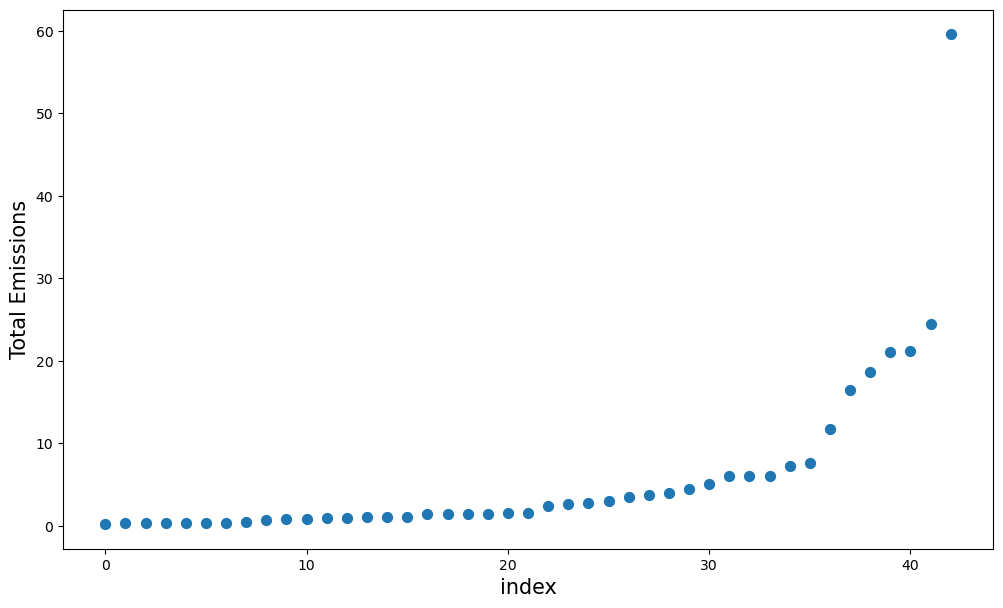

In [12]:
plt.figure(figsize=(12,7))
plt.scatter(range(df.shape[0]), np.sort(df.Total_emissions.values), s= 50)
plt.xlabel('index', fontsize=15)
plt.ylabel('Total Emissions', fontsize=15)
plt.show()

<h3 style="color:#8B0000;">Investigate which foods contribute to most of the carbon footprint:</h3>

In [13]:
food_df= df.groupby("Food product")['Total_emissions'].sum().reset_index()

trace = go.Scatter(
    y = food_df.Total_emissions,
    x = food_df["Food product"],
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = food_df.Total_emissions*2,
        color = food_df.Total_emissions,
        colorscale='Portland',
        showscale=True
    )
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Total Emissions by Foods',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Total Emissions',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatterplot')

1. Looks like Beef is responsible for most of the greenhouse gas emissions.

2. Plant based foods are hardly visible in the graph indicating their significanly low carbon footprint.¶

<h3 style="color:#8B0000;">Greenhouse gas emissions across the supply chain:</h3>

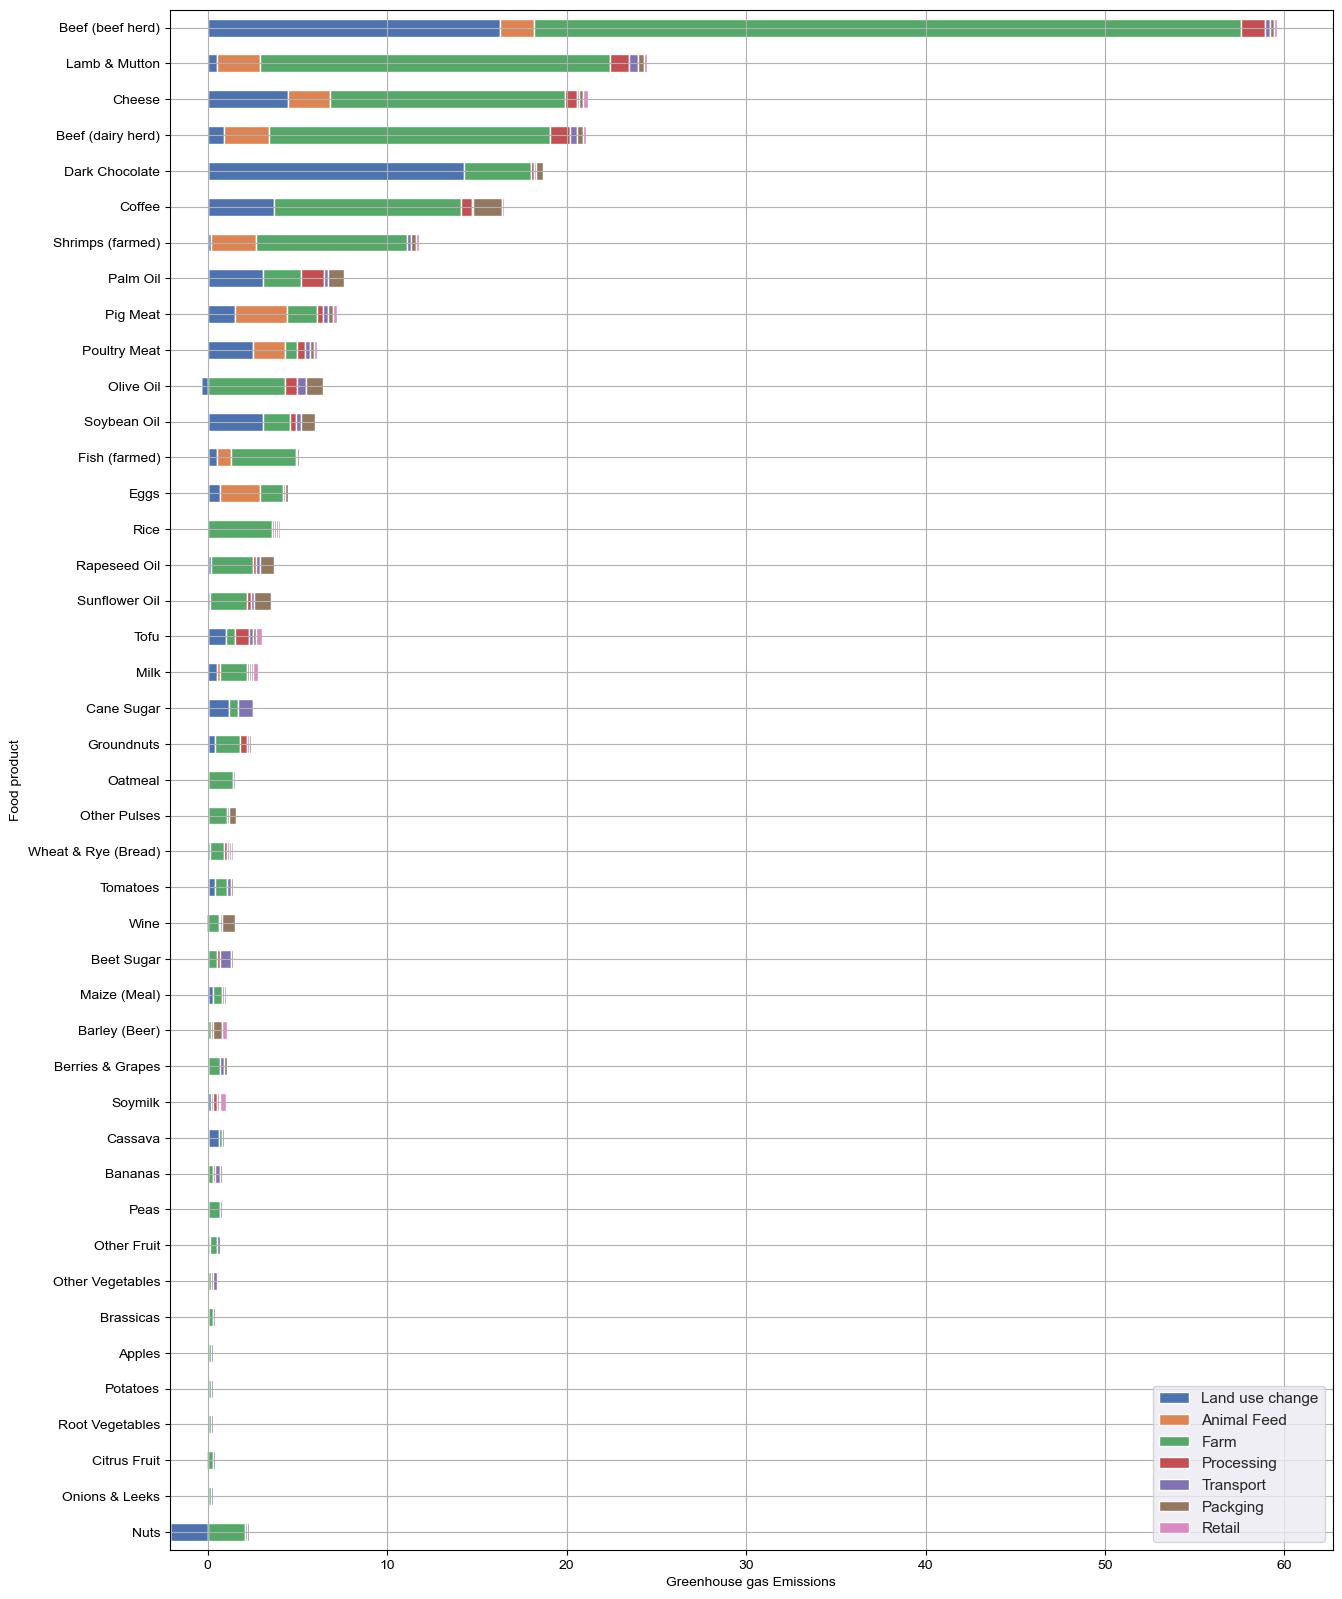

In [14]:
temp_df= df.sort_values(by= "Total_emissions", ascending= True).iloc[:,:8]

fig, ax = plt.subplots(figsize=(15,20))
sns.set()
temp_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()

1. Most of the greenhouse gas emissions happen in the farm which is way high for beef farming.

2. CO2 emissions from most plant based Foods are much lower than most animal based foods. #Govegan

3. Factors such as Transport, distance, retail , packaging are often small compared to importance of food type.

<h3 style="color:#8B0000;">Land Use by Foods per 1000 Kcal</h3>

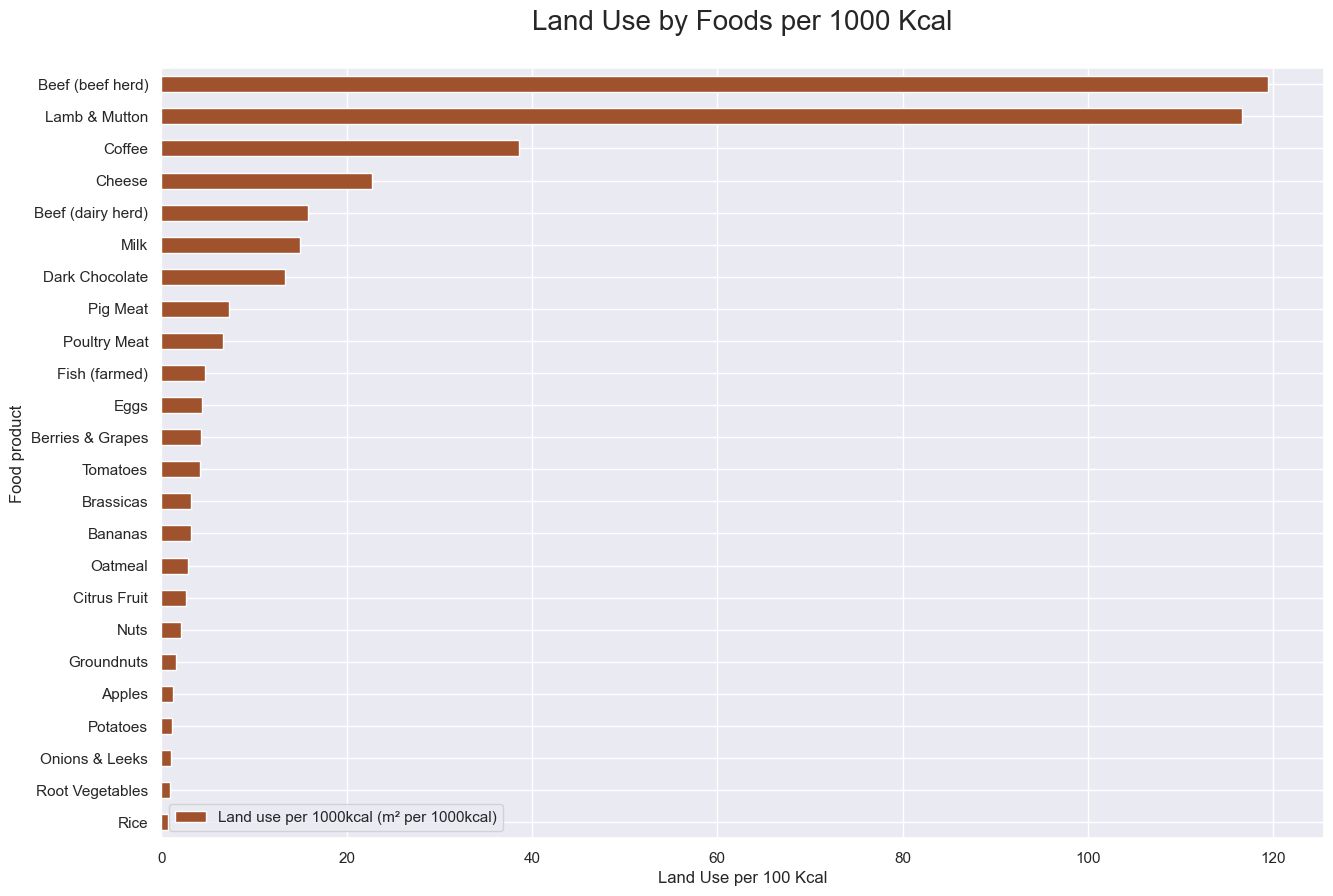

In [15]:
land_df= df.dropna().sort_values(by= 'Land use per 1000kcal (m² per 1000kcal)', ascending= True)[['Food product','Land use per 1000kcal (m² per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per 100 Kcal")
plt.title("Land Use by Foods per 1000 Kcal\n", size= 20)
plt.show()

Most of the land is used in the cultivation of beaf, Lamb & Mutton while all the plant based foods are at the bottom

<h3 style="color:#8B0000;">Land Use by Foods per Kg</h3>

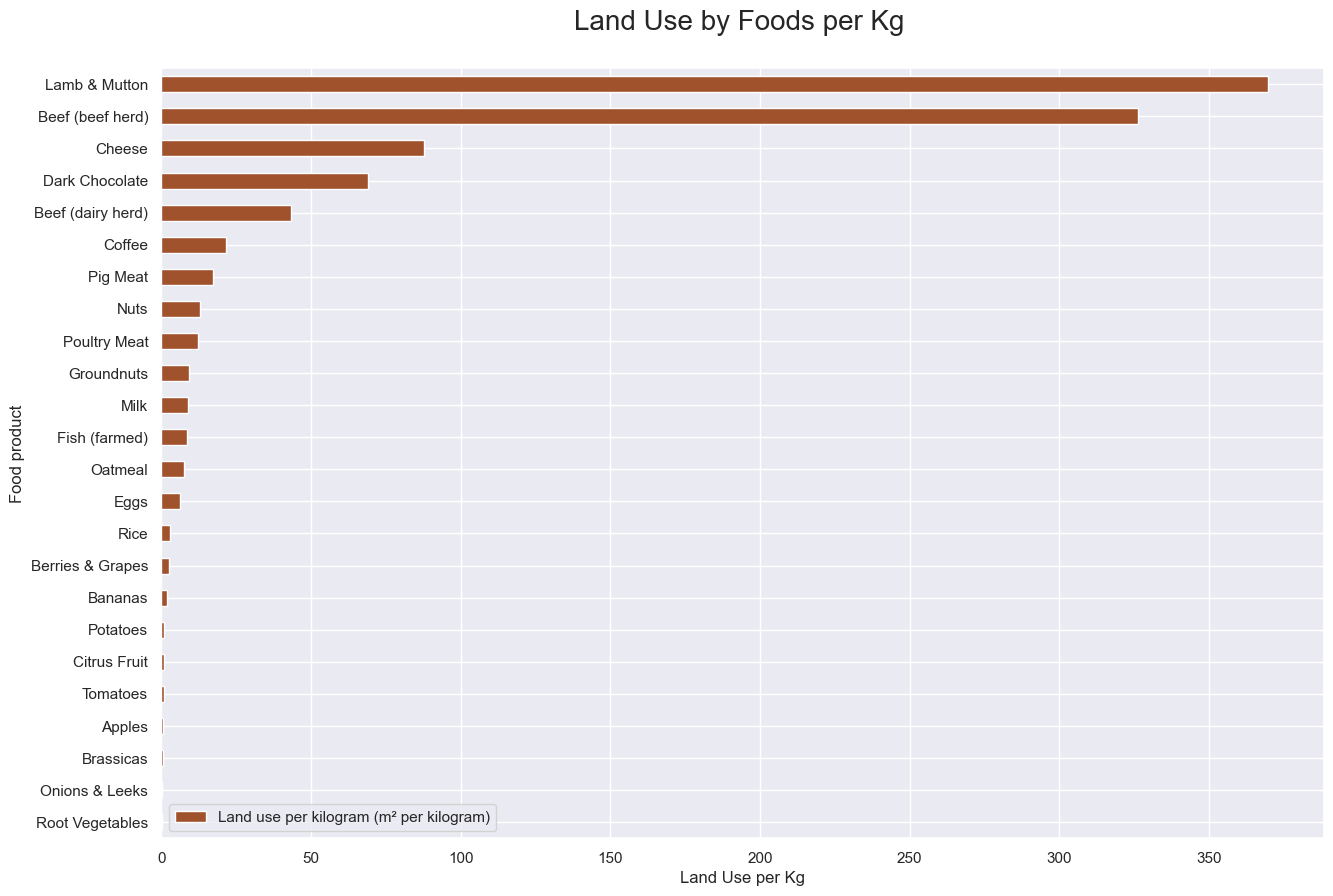

In [16]:
land_df= df.dropna().sort_values(by= 'Land use per kilogram (m² per kilogram)', ascending= True)[['Food product',
       'Land use per kilogram (m² per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
land_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "sienna")
plt.xlabel("Land Use per Kg")
plt.title("Land Use by Foods per Kg \n", size= 20)
plt.show()

More land is used by lamb & Mutton to produce same amount of food than beef.

<h3 style="color:#8B0000;">Fresh Water Use by Foods per 1000Kcal</h3>

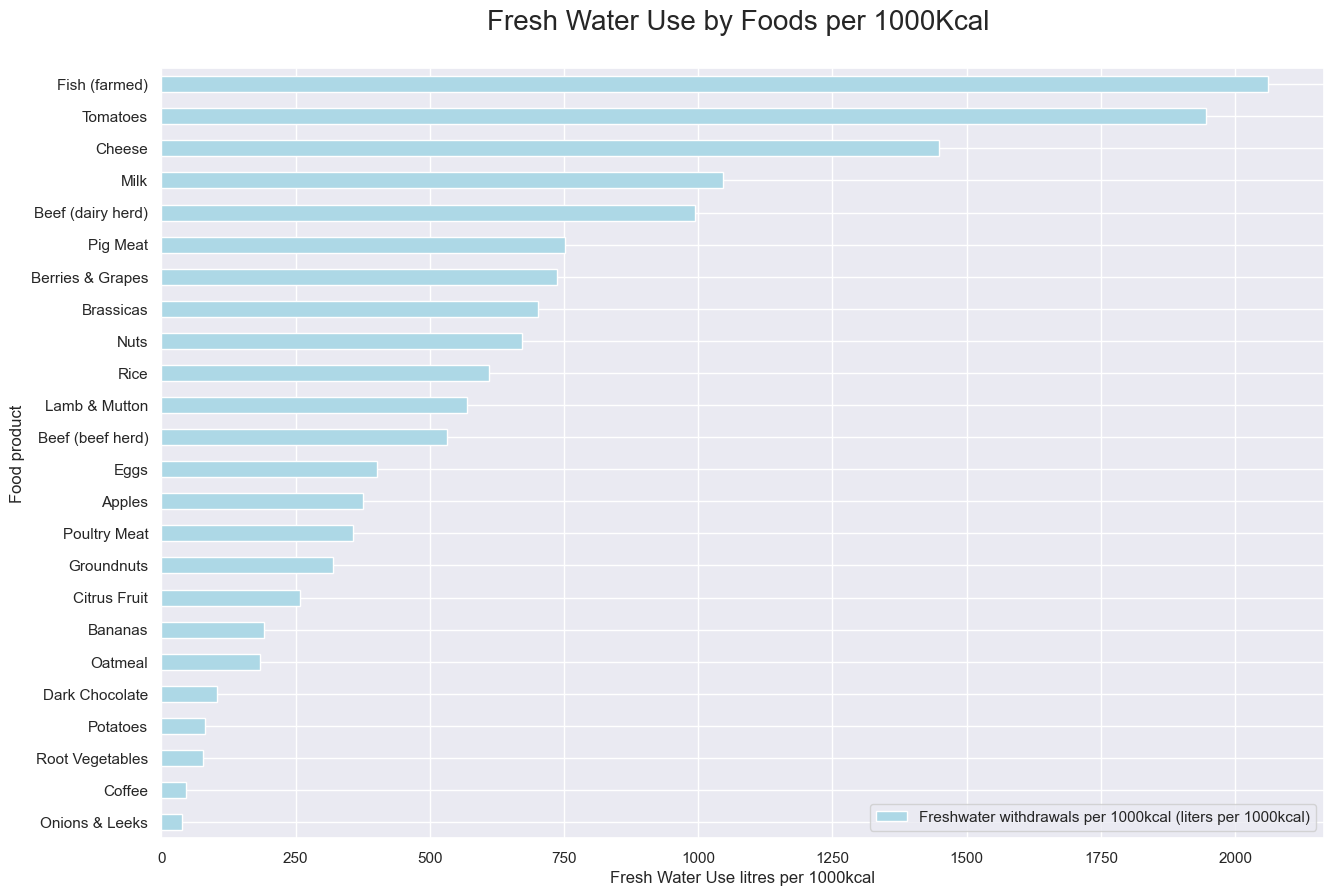

In [17]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per 1000kcal (liters per 1000kcal)', ascending= True)[['Food product',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per 1000kcal")
plt.title("Fresh Water Use by Foods per 1000Kcal \n", size= 20)
plt.show()

1. Most of the Fresh water usage in litres per 1000 Kcal of food is done by Fish, Tomatoes and dairy products.

2. Potatoes, root vegetables, coffee and Onions are some of the foods which require very less water to produce

<h3 style="color:#8B0000;">Fresh Water Use by Foods per Kg</h3>

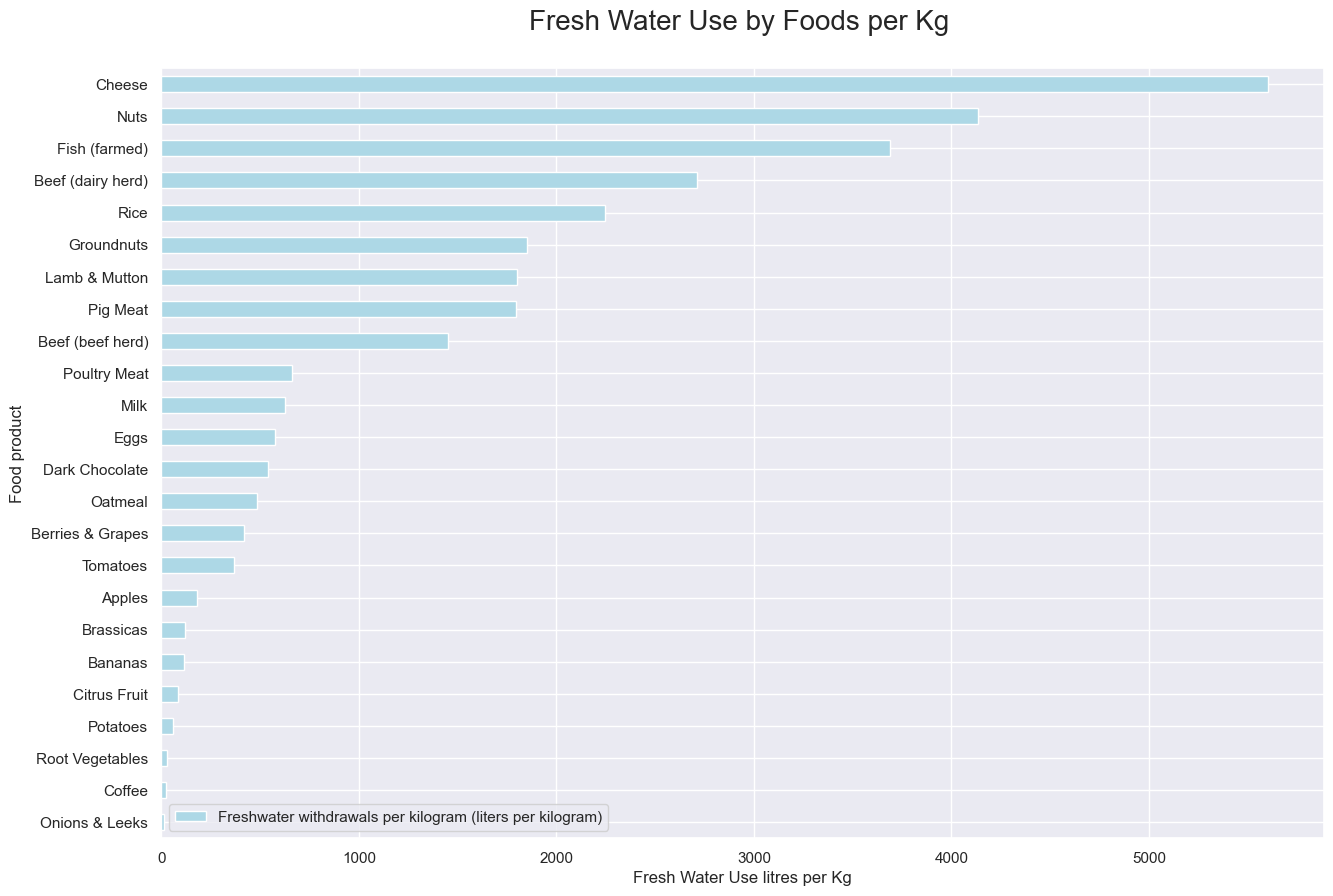

In [18]:
water_df= df.dropna().sort_values(by= 'Freshwater withdrawals per kilogram (liters per kilogram)', ascending= True)[['Food product',
       'Freshwater withdrawals per kilogram (liters per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
water_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "lightblue")
plt.xlabel("Fresh Water Use litres per Kg")
plt.title("Fresh Water Use by Foods per Kg \n", size= 20)
plt.show()

Cheese and Nuts need more water to produce same amount(1 kg) of food than fish which takes more water if we compare them by amount of energy produced

<h3 style="color:#8B0000;">Greenhouse Gas Emission Per 1000kcal</h3>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



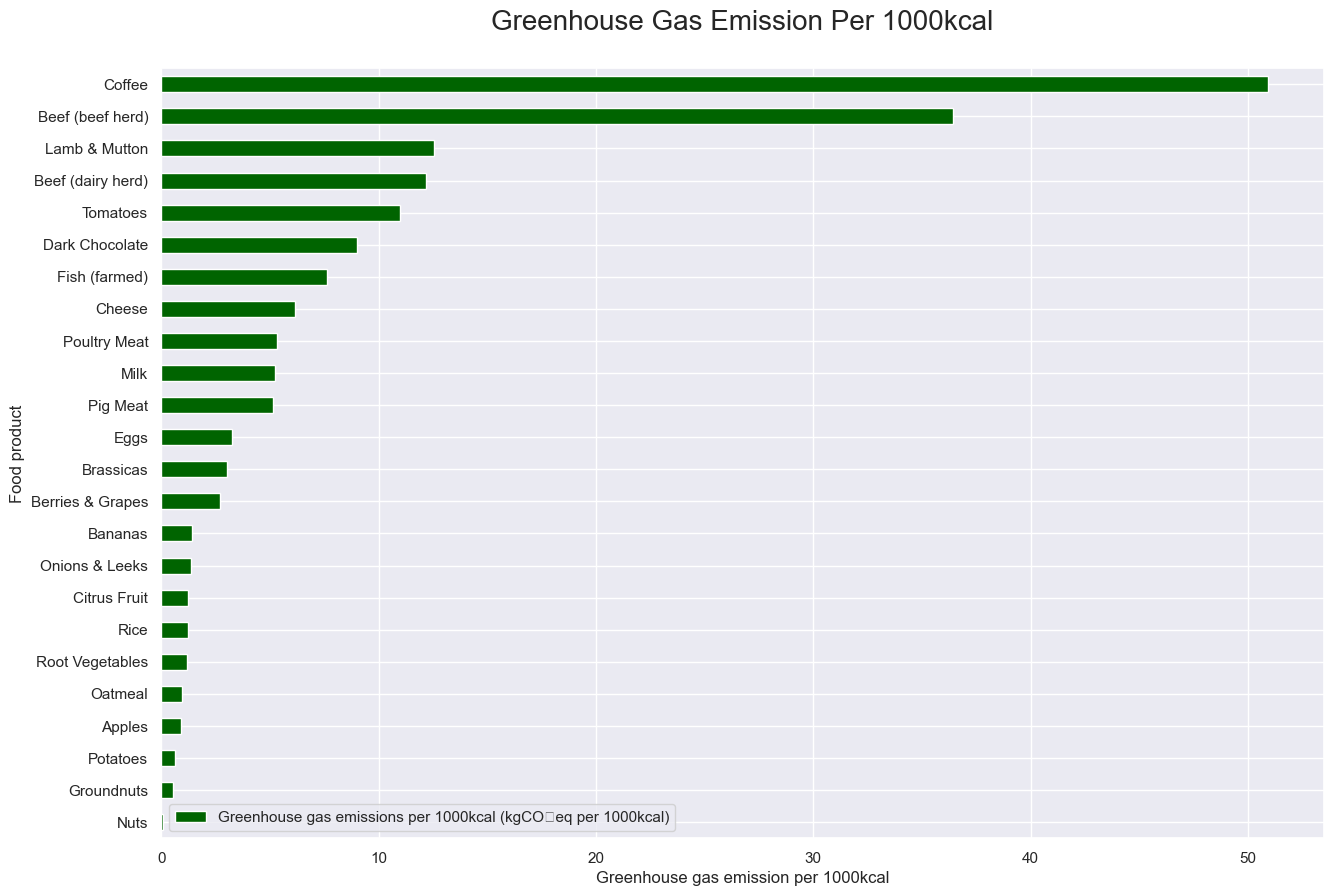

In [19]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 1000kcal")
plt.title("Greenhouse Gas Emission Per 1000kcal\n", size= 20)
plt.show()

1. Coffee has the most carbon footprint per 1000kcal followed by beef which is not surprising.

2. Animal based foods produce around 50% more emissions than plant based foods like potatoes, apples, groundnuts.

<h3 style="color:#8B0000;">Greenhouse Gas Emission Per 100g Protein</h3>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



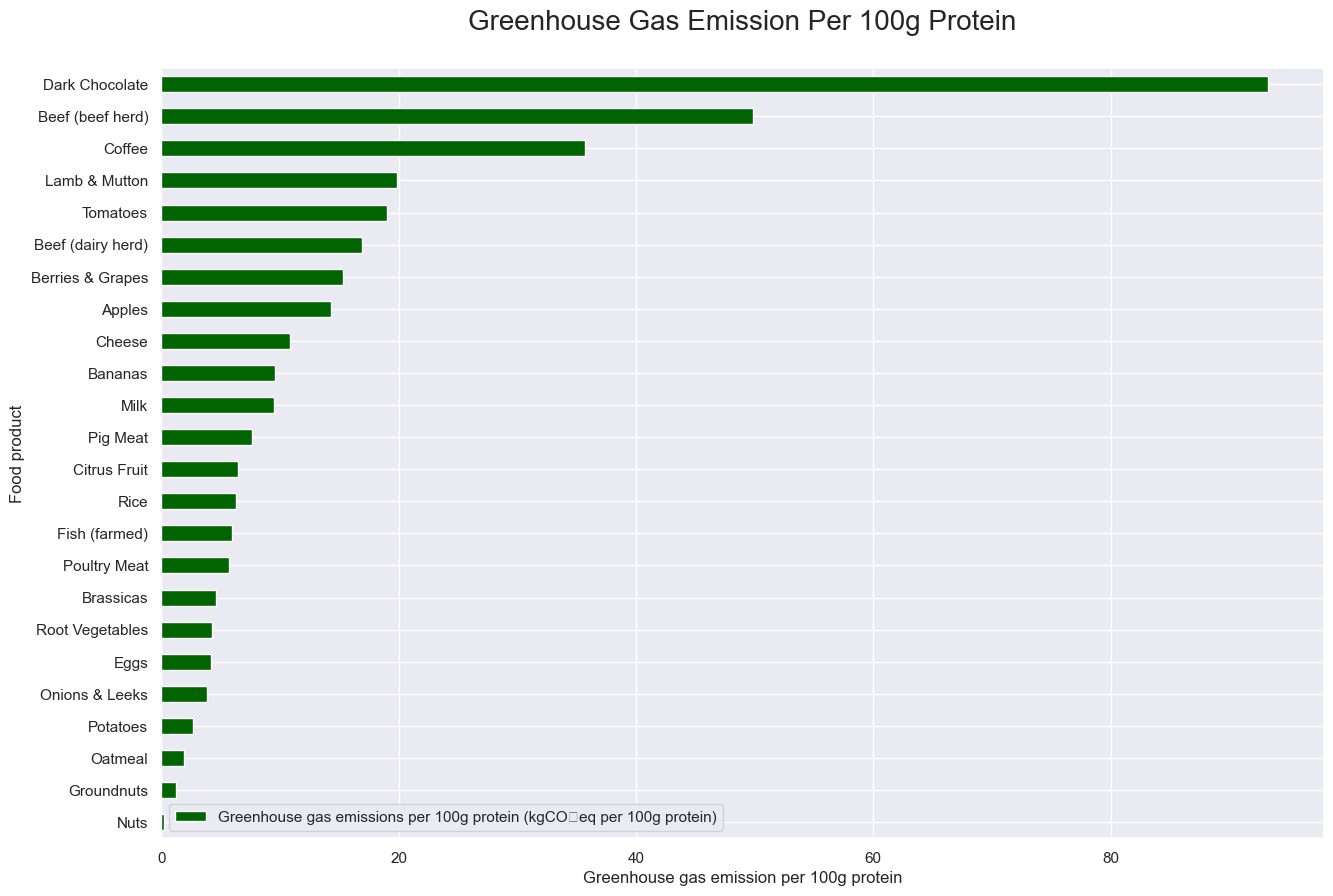

In [20]:
emission_df= df.dropna().sort_values(by= 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "darkgreen")
plt.xlabel("Greenhouse gas emission per 100g protein")
plt.title("Greenhouse Gas Emission Per 100g Protein\n", size= 20)
plt.show()

Dark chocolate has most carbon footprint in terms of nutritional values(per 100g protein)

<h3 style="color:#8B0000;">Comparing eutrophication emissions per 1000kcal</h3>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.



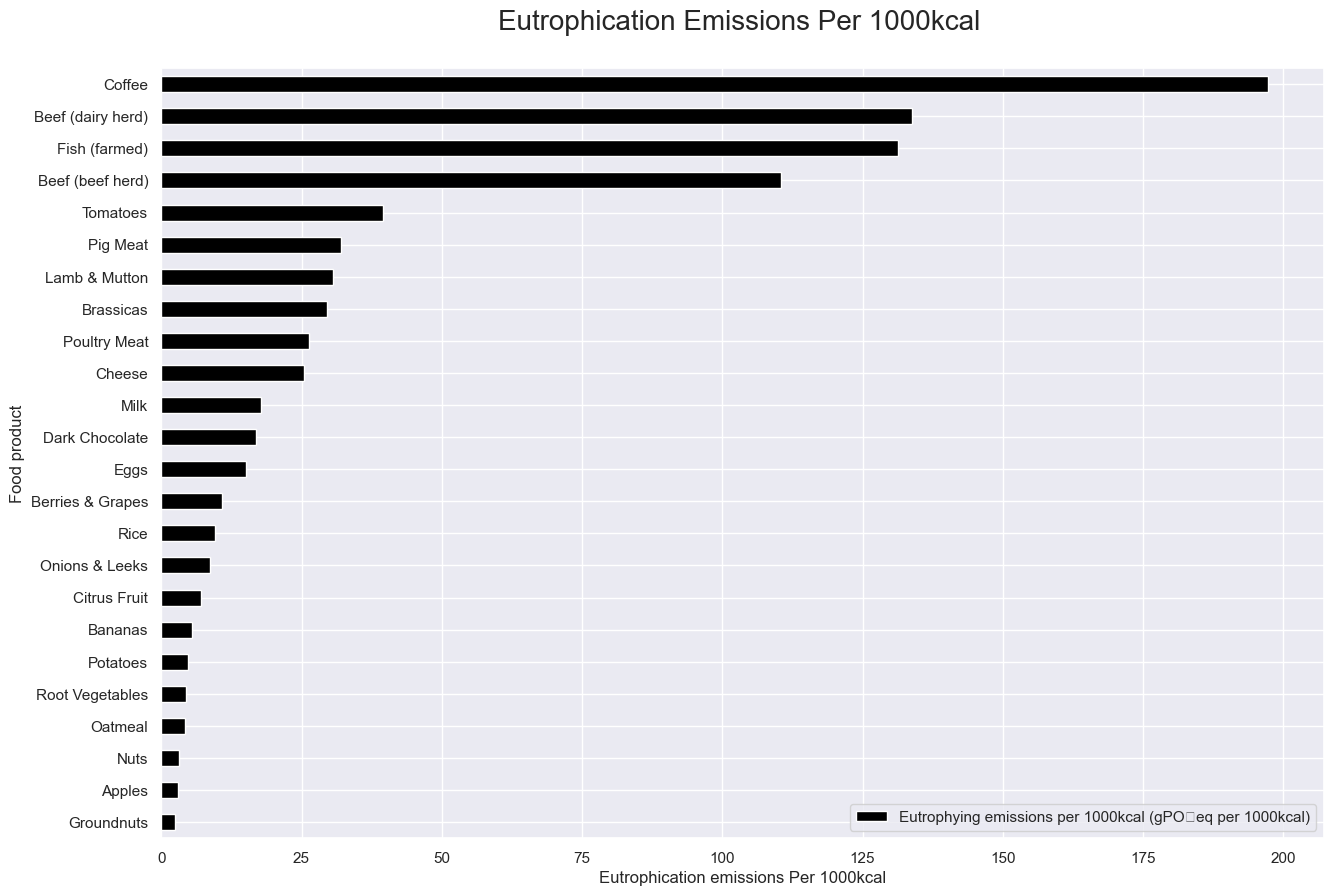

In [21]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "black")
plt.xlabel('Eutrophication emissions Per 1000kcal')
plt.title('Eutrophication Emissions Per 1000kcal \n', size= 20)
plt.show()

Coffee does the most eutrophication emission when compared by energy per 1000kcal. Plant based foods are at the bottom

<h3 style="color:#8B0000;">Comparing eutrophication emissions of different foods required to produce 1 kg food</h3>

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.



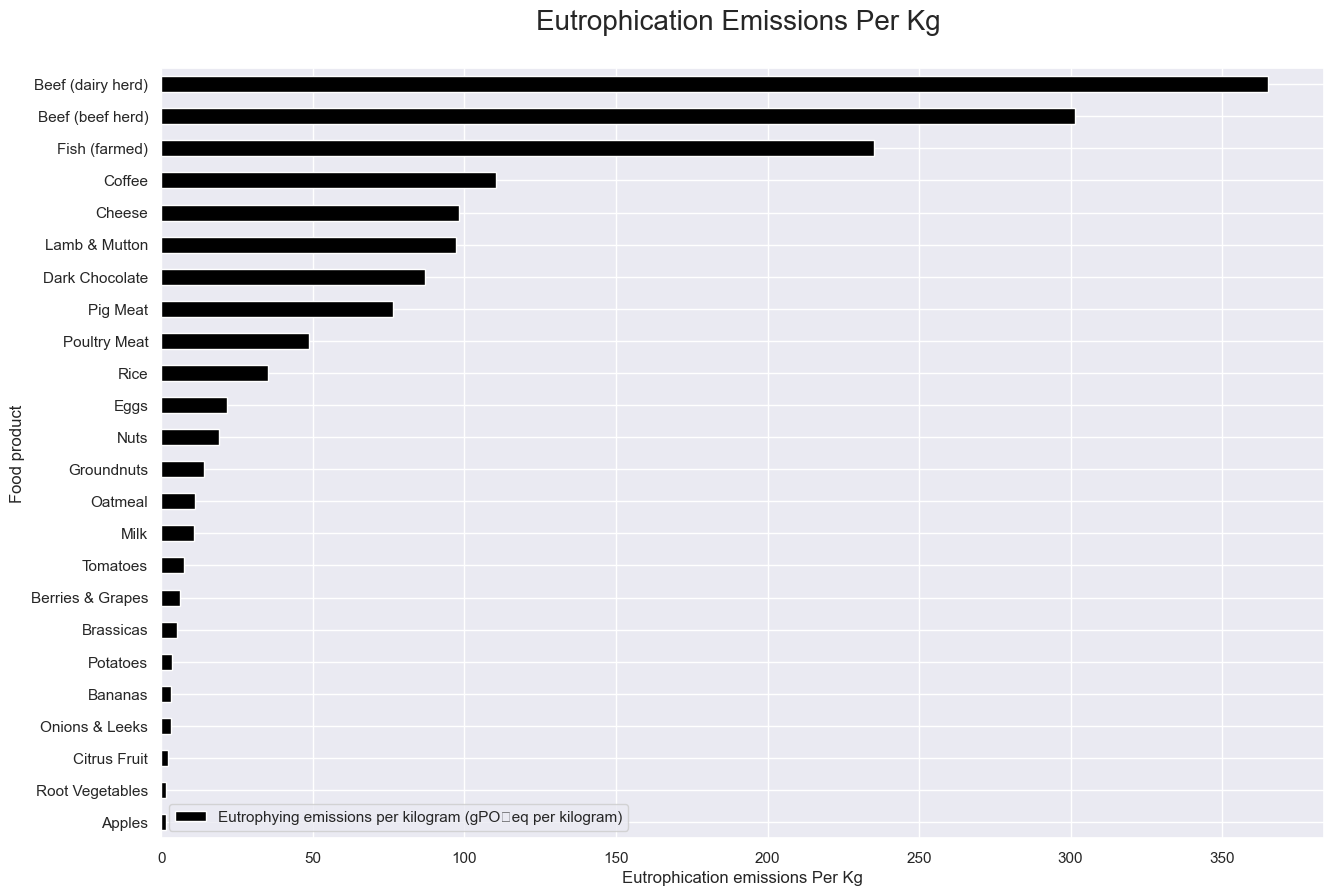

In [22]:
eutrophication_df= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutrophication_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "black")
plt.xlabel('Eutrophication emissions Per Kg')
plt.title('Eutrophication Emissions Per Kg \n', size= 20)
plt.show()

Animal based foods are most responsible for eutrophication emission to produce 1kg while plant-based foods contibute very less

<h3 style="color:#8B0000;">Food distribution by emissions via Transport</h3>

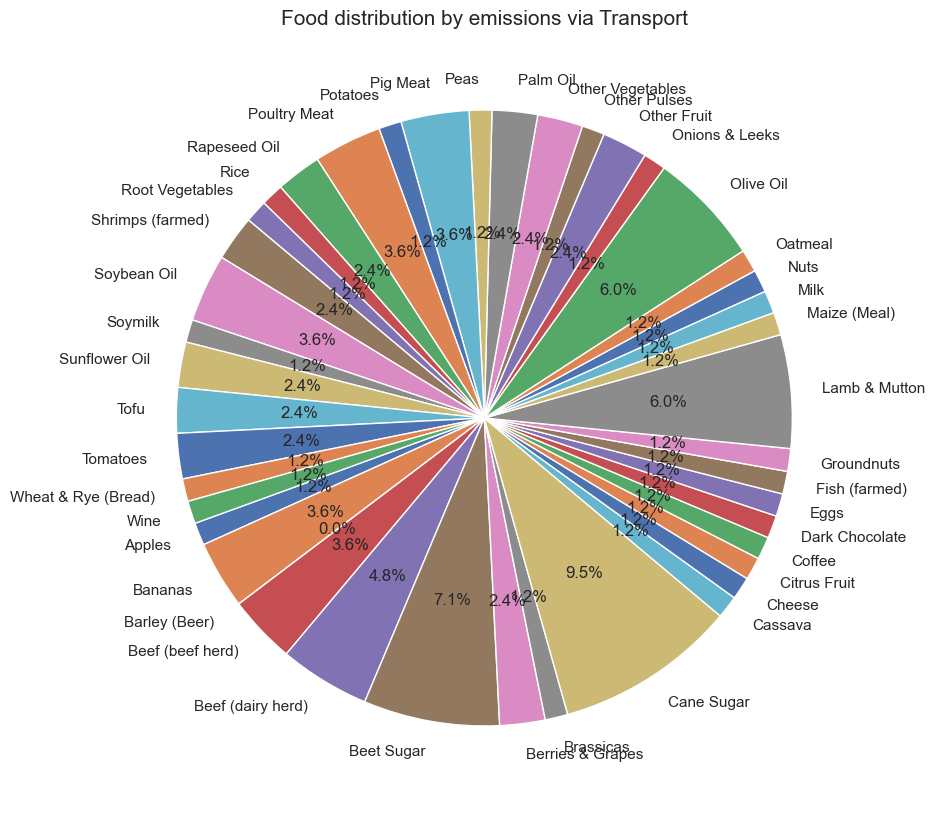

In [23]:
plt.figure(figsize=(10,10))
temp_series = df.groupby('Food product')['Transport'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution by emissions via Transport", fontsize=15)
plt.show()

Emissions via transport are uniform across different foods with cane sugar having most share.

<h3 style="color:#8B0000;"> To check the relation among different attributes of foods
</h3>

C:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.

C:\Users\admin\anaconda3\lib\site-packages\seaborn\utils.py:660: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from current font.

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



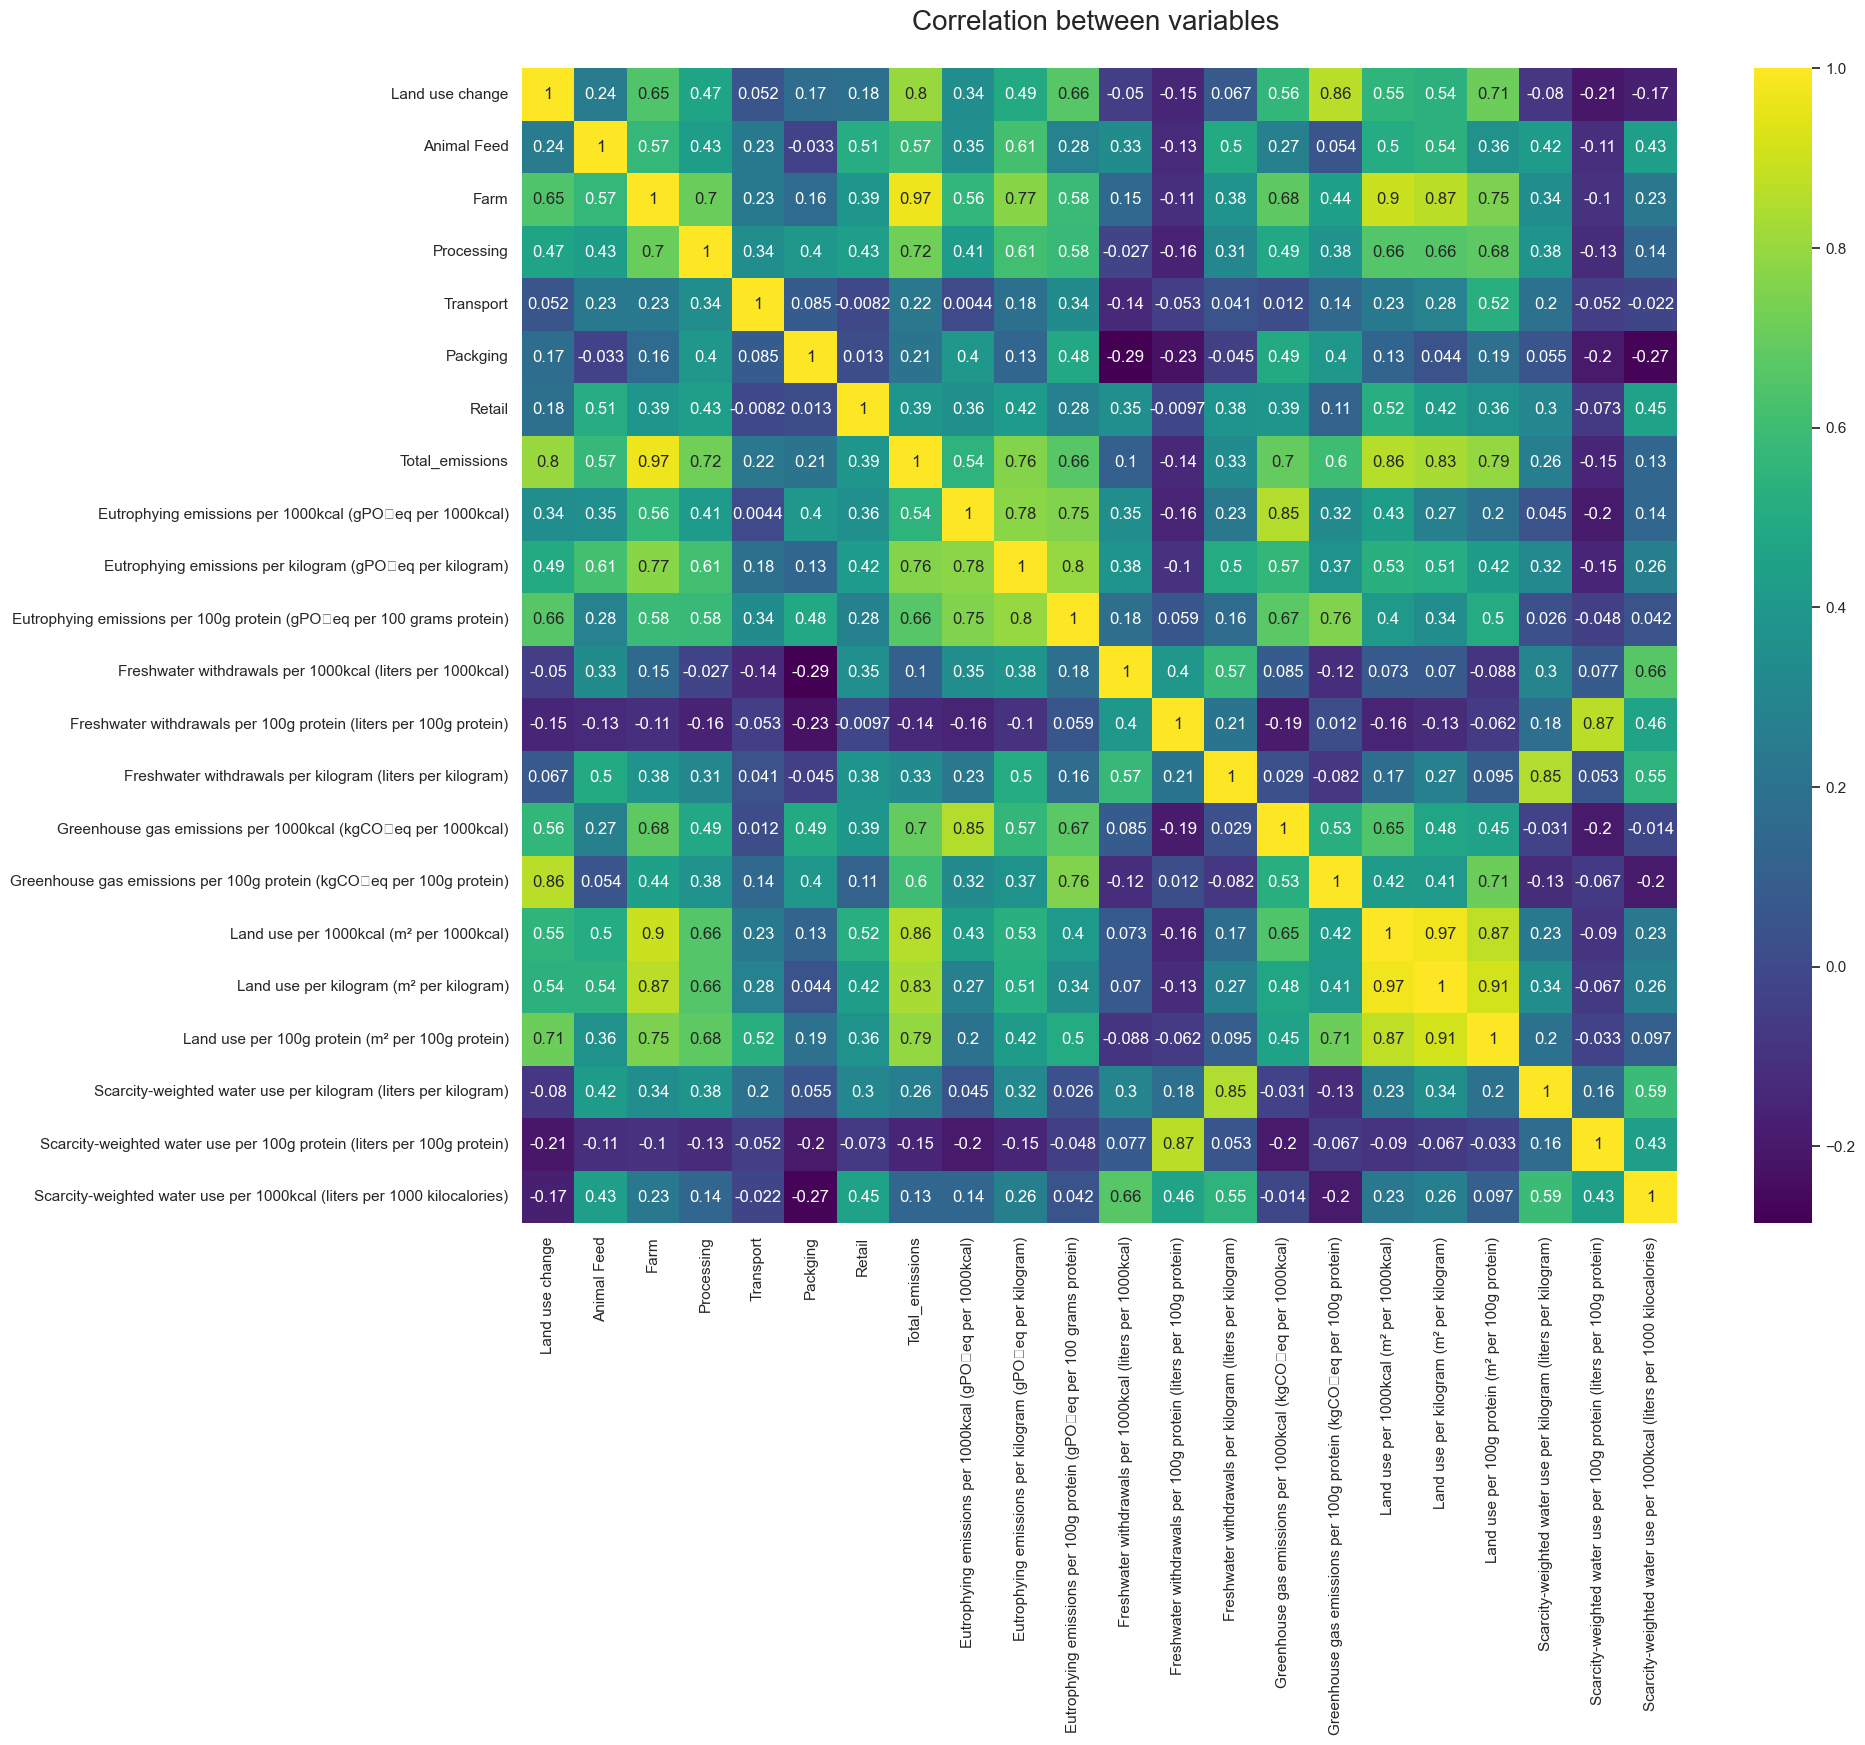

In [24]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, annot= True,cmap= "viridis")
plt.title("Correlation between variables \n", fontsize=20)
plt.show()

There are many variables which are correlated with each other like Farm and Total emission

<h3 style="color:#8B0000;">Set Food Product column as index:</h3>

In [25]:
df = df.set_index('Food product')
df.head()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


<h3 style="color:#8B0000;">Fill the missing values with 0 in data frame:</h3>

In [26]:
df = df.fillna(0)
df.head()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,0.000000,0.00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480



<h3 style="color:#8B0000;"> Store Features into a feature matrix X and Response variable into a response vector y:</h3>

In [27]:
#Features
#loc[what rows, what cols]
X = df.loc[:,df.columns != 'Total_emissions']
#Response
y = df['Total_emissions']



<h1 style="color:#black;font-size:30px"> Modelling: Regression  Techniques:</h1>


<h3 style="color:#8B0000;">Divide the dataset into training set and testing set (90 percent train and 10 percent test):  </h3>

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,  test_size=0.10, random_state=42)  


<h3 style="color:#8B0000;"> Scaled the dataset using StandardScaler:  </h3>

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


<h1 style="color:#008000;font-size:30px">Decision Tree Regressor:</h1>


<h3 style="color:#8B0000;"> Fit the Decision Tree Regressor on training set and make prediction on testing set:  </h3>

In [30]:
#Initialize the model
Dt_Regressor = DecisionTreeRegressor(random_state=42)
# Fit the model on training set
Dt_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_dt = Dt_Regressor.predict(X_test_scaled)


<h3 style="color:#8B0000;">   Evaluate the Decision Tree Regressor using R2 score: </h3>

In [31]:
accu_dt = r2_score(y_pred_dt, y_test)

# Print the prediction accuracy
print('Test R2 score Decision Tree Regressor :', accu_dt)

Test R2 score Decision Tree Regressor : 0.8934879681289946




<h1 style="color:#008000;font-size:30px">Random Forest Regressor:</h1>


<h3 style="color:#8B0000;">  Fit the Random Forest Regressor on training set and make prediction on testing set: </h3>

In [32]:
#Initialize the model
Rf_Regressor = RandomForestRegressor(n_estimators = 100, random_state=42)
# Fit the model on training set
Rf_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_rf = Rf_Regressor.predict(X_test_scaled)


<h3 style="color:#8B0000;">   Evaluate the Random Forest Regressor using R2 score: </h3>

In [33]:
accu_rf = r2_score(y_pred_rf, y_test)

# Print the prediction accuracy
print('Test R2 score Random Forest Regressor :', accu_rf)

Test R2 score Random Forest Regressor : 0.9475129741197114




<h1 style="color:#008000;font-size:30px">Ada Boost Regressor:</h1>


<h3 style="color:#8B0000;"> Fit the Ada Boost Regressor on training set and make prediction on testing set:  </h3>

In [34]:
#Initialize the model
Ab_Regressor = AdaBoostRegressor(n_estimators = 100, random_state=42)
# Fit the model on training set
Ab_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_ab = Ab_Regressor.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the Ada Boost Regressor using R2 score:   </h3>

In [35]:
accu_ab = r2_score(y_pred_ab, y_test)

# Print the prediction accuracy
print('Test R2 score AdaBoost Regressor :', accu_ab)

Test R2 score AdaBoost Regressor : 0.8973884648508348




<h1 style="color:#008000;font-size:30px">K-nearest Neighbour Regressor:</h1>


<h3 style="color:#8B0000;"> Fit the K-nearest Neighbour Regressor on training set and make prediction on testing set:  </h3>

In [36]:
#Initialize the model
Knn_Regressor = KNeighborsRegressor()
# Fit the model on training set
Knn_Regressor.fit(X_train_scaled, y_train)
#  make prediction on testing set
y_pred_knn = Knn_Regressor.predict(X_test_scaled)


<h3 style="color:#8B0000;"> Evaluate the K-nearest Neighbour Regressor using R2 score: </h3>

In [37]:
accu_knn = r2_score(y_pred_knn, y_test)
accu_knn = abs(accu_knn)
# Print the prediction accuracy
print('Test R2 score K-nearest Neighbour Regressor :', (accu_knn))

Test R2 score K-nearest Neighbour Regressor : 0.4611487824585314



<h3 style="color:#8B0000;"> Create two lists of model name and respective R2 scores: </h3>

In [38]:
Default_Accuracies = pd.Series([accu_knn,accu_dt, accu_rf, accu_ab,  ])
Model_Names = ['KNN Regressor','DecisionTree Regressor','RandomForest Regressor' ,'AdaBoost Regressor' ,]


<h3 style="color:#8B0000;">Comparision of Models  in terms  evaluation metric (R2 Score):  </h3>

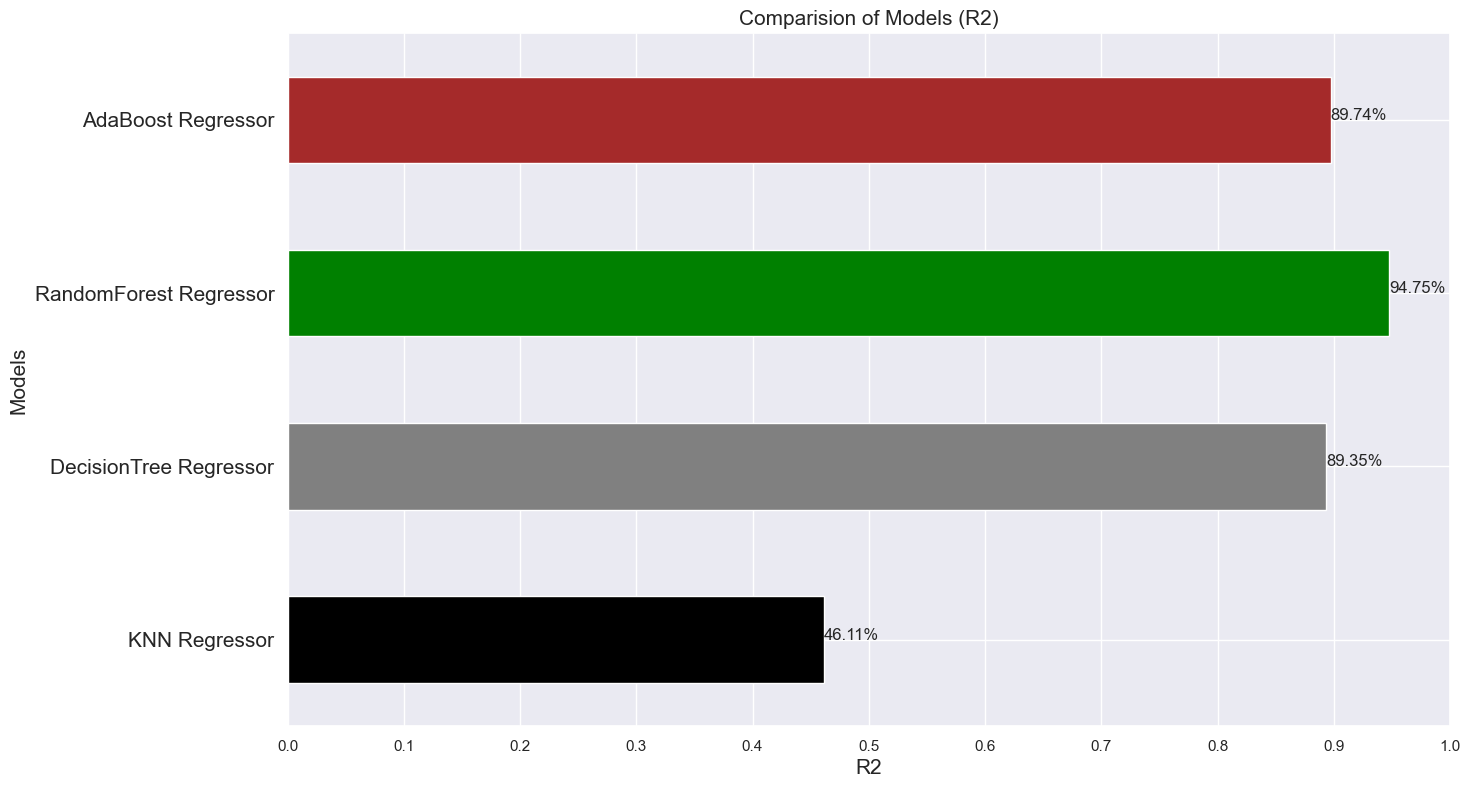

In [39]:
ax = Default_Accuracies.plot(kind = 'barh',figsize=(15,9),color=['black','gray','green','brown','pink','blue','red'])
ax.set_title('Comparision of Models (R2)',fontsize=15)
ax.set_xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
ax.set_yticklabels(Model_Names,fontsize=15,)
ax.set_ylabel("Models",fontsize=15)
ax.set_xlabel("R2",fontsize=15)
[ax.text(v, i, '{:.2f}%'.format(100*v)) for i, v in enumerate(Default_Accuracies)];
plt.show()

##### Hence from the above comparison of the models in terms of R2 score we can see that Random Forest Regression model out performed all the other models by giving the highest R2 of 94.75% and AdaBoost model comes at second position by giving an R2 score of 89.74%.